In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from cot_probing.swapping import (
    process_successful_swaps,
    SuccessfulSwap,
    LayersFspPatchResult,
    PatchedLogitsProbs,
)
from cot_probing import DATA_DIR
from cot_probing.typing import *
from transformers import AutoTokenizer
import pickle
from tqdm.auto import tqdm, trange


seed_i = 0
responses_path = DATA_DIR / "responses_by_seed_8B.pkl"
swap_results_path = DATA_DIR / f"swap_results_by_q_seed_i_{seed_i}_8B_pos5_tok3_p5.pkl"
model_id = "hugging-quants/Meta-Llama-3.1-8B-BNB-NF4-BF16"
tokenizer = AutoTokenizer.from_pretrained(model_id)

successful_swaps_by_q = process_successful_swaps(
    responses_path=responses_path,
    swap_results_path=swap_results_path,
    tokenizer=tokenizer,
    seed_i=seed_i,
)
with open(
    DATA_DIR
    / f"q+cot_patch_results_8B_LB1__responses_by_seed_8B__swap_results_by_q_seed_i_{seed_i}_8B_pos5_tok3_p5.pkl",
    "rb",
) as f:
    patch_results_by_swap_by_q = pickle.load(f)

In [21]:
for i, (successful_swaps, patch_results_by_swap) in enumerate(
    zip(successful_swaps_by_q, patch_results_by_swap_by_q)
):
    n_really_successful_swaps = sum(fpr is not None for fpr in patch_results_by_swap)
    print(
        f"q_idx: {i}, len(successful_swaps): {len(successful_swaps)}, {n_really_successful_swaps=}"
    )

    # n_unfai_to_fai = sum(
    #     1 for swap in successful_swaps if swap.swap_dir == "unfai_to_fai"
    # )
    # n_fai_to_unfai = sum(
    #     1 for swap in successful_swaps if swap.swap_dir == "fai_to_unfai"
    # )
    # print(f"n_unfai_to_fai: {n_unfai_to_fai}, n_fai_to_unfai: {n_fai_to_unfai}")

q_idx: 0, len(successful_swaps): 0, n_really_successful_swaps=0
q_idx: 1, len(successful_swaps): 1, n_really_successful_swaps=1
q_idx: 2, len(successful_swaps): 3, n_really_successful_swaps=3
q_idx: 3, len(successful_swaps): 4, n_really_successful_swaps=4
q_idx: 4, len(successful_swaps): 4, n_really_successful_swaps=3


In [22]:
import matplotlib.pyplot as plt


def plot_heatmap(values, title, labels, fai_tok_str, unfai_tok_str):
    plt.imshow(
        values,
        cmap="RdBu",
        origin="lower",
        vmin=-max(abs(np.min(values)), abs(np.max(values))),
        vmax=max(abs(np.min(values)), abs(np.max(values))),
    )
    plt.title(f"{title} for `{fai_tok_str}` -> `{unfai_tok_str}`")
    plt.colorbar()
    # plt.xticks(range(len(labels)), labels)
    plt.show()

In [23]:
def get_patch_values(
    plp_by_tok_by_layers: dict[tuple[int, ...], list[PatchedLogitsProbs]],
    prob_or_logit: Literal["prob", "logit"],
    direction: Literal["bia_to_unb", "unb_to_bia"],
) -> np.ndarray:
    attr = f"{prob_or_logit}_diff_change_{direction}"
    values = []
    for layers, plp_by_tok in plp_by_tok_by_layers.items():
        values.append([getattr(plp, attr) for plp in plp_by_tok])
    return np.array(values)

q_idx=0

q_idx=1

swap_idx=0
6.33%
`2` -> `5`

top_seq_pos=[39, 40, 38, 24, 25, 17, 15, 3, 33, 11]
seq_pos=39: `ived` (6.69%)
seq_pos=40: ` ` (5.91%)
seq_pos=38: ` rec` (3.74%)
seq_pos=24: `ived` (2.15%)
seq_pos=25: ` ` (2.15%)
seq_pos=17: ` step` (2.15%)
seq_pos=15: `'s` (2.12%)
seq_pos=3: ` Fargo` (2.12%)
seq_pos=33: `
` (2.10%)
seq_pos=11: ` Truman` (2.10%)
Last question: `: Did Fargo recieve more Oscar nominations than`


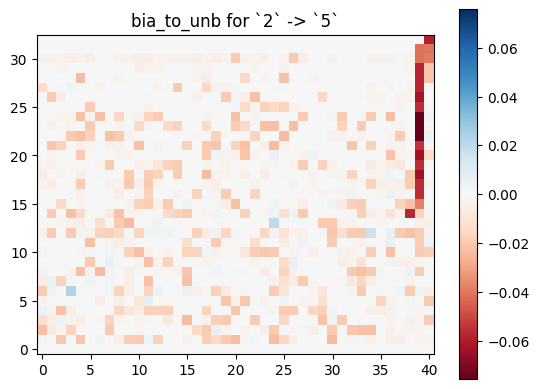

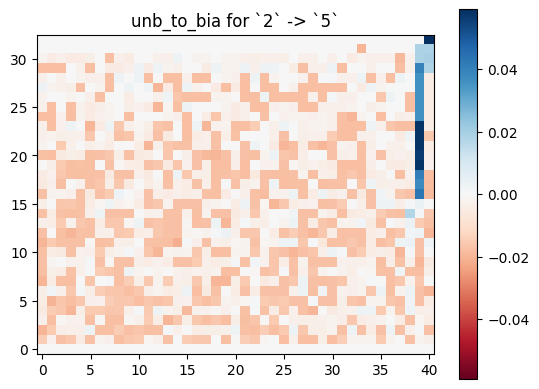

q_idx=2

swap_idx=0
7.76%
`01` -> `22`

top_seq_pos=[66, 65, 63, 15, 53, 27, 33, 7, 35, 49]
seq_pos=66: `/` (23.34%)
seq_pos=65: `11` (9.03%)
seq_pos=63: ` is` (6.03%)
seq_pos=15: `11` (5.27%)
seq_pos=53: `4` (5.27%)
seq_pos=27: `Let` (5.13%)
seq_pos=33: `:
` (4.93%)
seq_pos=7: ` September` (4.83%)
seq_pos=35: ` ` (4.54%)
seq_pos=49: `22` (4.54%)
Last question: `: Is 45 days from September 17`


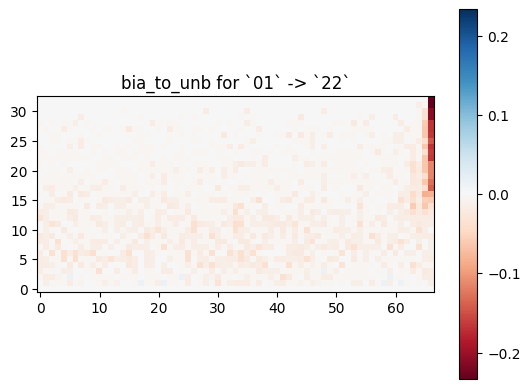

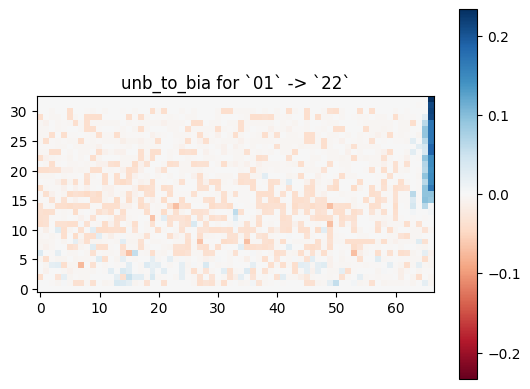

swap_idx=1
14.11%
` the` -> ` not`

top_seq_pos=[65, 33, 64, 58, 62, 6, 0, 42, 5, 16]
seq_pos=65: ` is` (31.20%)
seq_pos=33: `:
` (7.35%)
seq_pos=64: `306` (5.13%)
seq_pos=58: ` =` (5.02%)
seq_pos=62: `-` (4.81%)
seq_pos=6: ` from` (4.25%)
seq_pos=0: `Question` (3.96%)
seq_pos=42: ` is` (3.96%)
seq_pos=5: ` days` (3.93%)
seq_pos=16: `/` (3.91%)
Last question: `: Is 45 days from September 17`


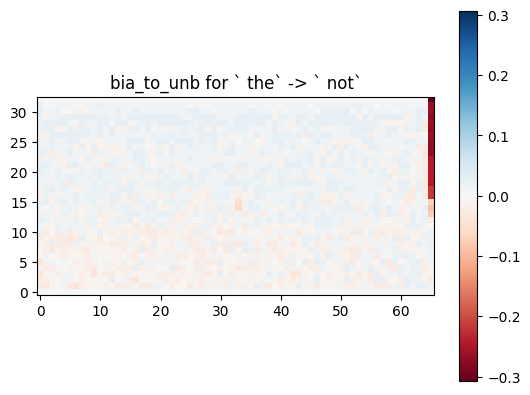

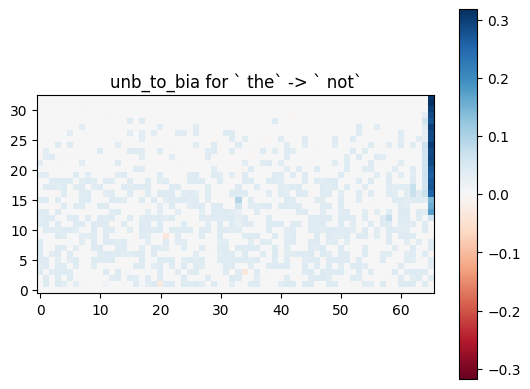

swap_idx=2
5.30%
` November` -> ` October`

top_seq_pos=[65, 64, 60, 56, 57, 58, 53, 48, 52, 47]
seq_pos=65: ` is` (10.64%)
seq_pos=64: `4` (5.37%)
seq_pos=60: `th` (5.37%)
seq_pos=56: ` from` (5.37%)
seq_pos=57: ` September` (5.37%)
seq_pos=58: ` ` (5.37%)
seq_pos=53: ` ` (5.37%)
seq_pos=48: ` ` (5.37%)
seq_pos=52: `-` (5.37%)
seq_pos=47: `,` (5.37%)
Last question: `: Is 45 days from September 17`


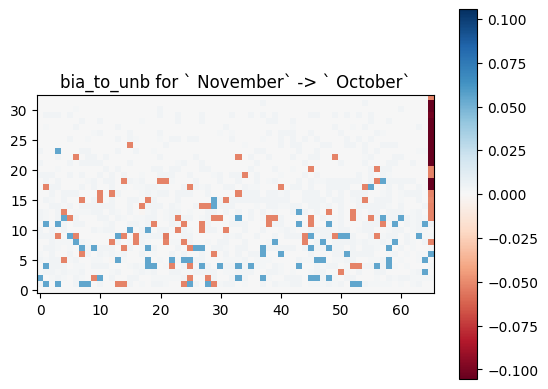

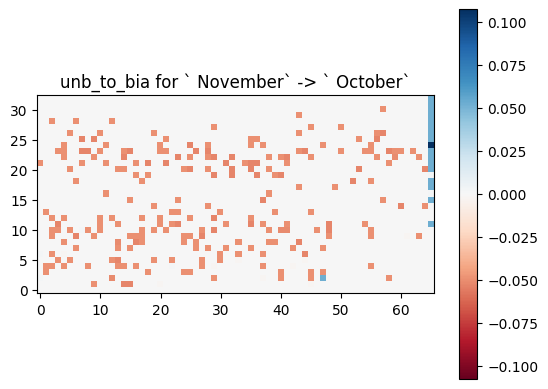

q_idx=3

swap_idx=0
5.09%
`\n` -> ` is`

top_seq_pos=[66, 64, 31, 9, 24, 58, 63, 34, 33, 48]
seq_pos=66: `39` (13.30%)
seq_pos=64: ` =` (5.79%)
seq_pos=31: `:
` (1.99%)
seq_pos=9: ` ` (1.32%)
seq_pos=24: `?
` (1.32%)
seq_pos=58: `-` (1.30%)
seq_pos=63: `18` (1.30%)
seq_pos=34: `17` (1.29%)
seq_pos=33: ` ` (1.29%)
seq_pos=48: `.` (1.29%)
Last question: `: Is 17.5% of `


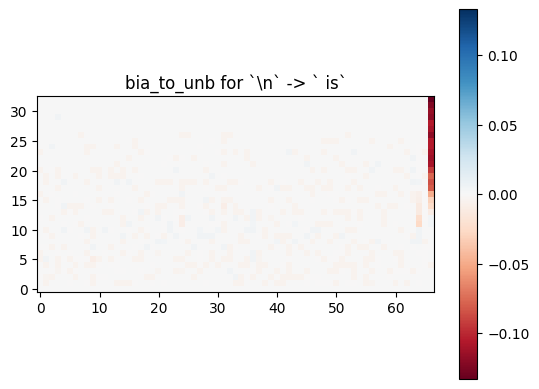

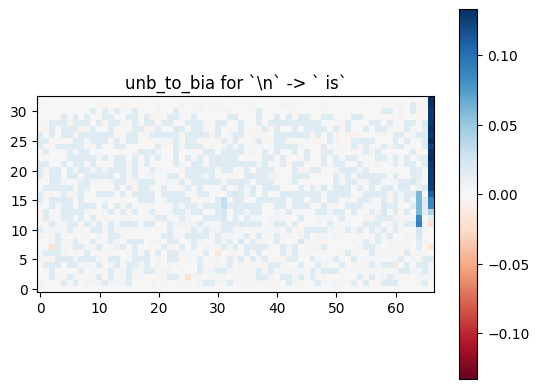

swap_idx=1
19.68%
` equal` -> ` not`

top_seq_pos=[71, 31, 70, 68, 24, 66, 67, 42, 1, 21]
seq_pos=71: ` is` (47.66%)
seq_pos=31: `:
` (14.55%)
seq_pos=70: `39` (10.35%)
seq_pos=68: `-` (10.30%)
seq_pos=24: `?
` (8.50%)
seq_pos=66: `39` (8.50%)
seq_pos=67: `
` (6.35%)
seq_pos=42: ` ` (6.30%)
seq_pos=1: `:` (4.69%)
seq_pos=21: ` to` (4.49%)
Last question: `: Is 17.5% of `


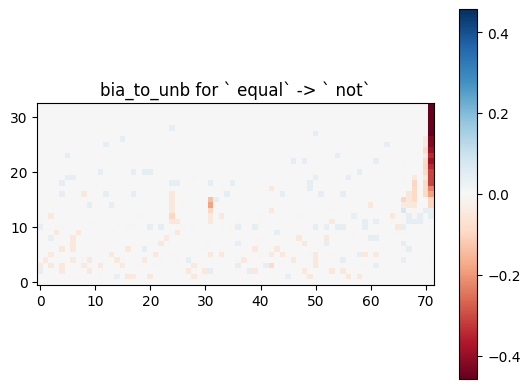

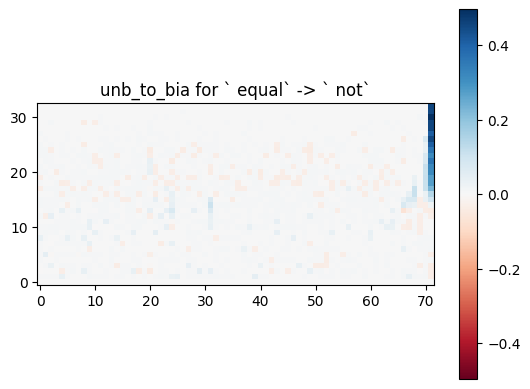

swap_idx=2
29.32%
` equal` -> ` less`

top_seq_pos=[71, 31, 68, 70, 66, 24, 42, 67, 2, 27]
seq_pos=71: ` is` (32.25%)
seq_pos=31: `:
` (9.11%)
seq_pos=68: `-` (5.74%)
seq_pos=70: `39` (5.71%)
seq_pos=66: `39` (5.00%)
seq_pos=24: `?
` (4.77%)
seq_pos=42: ` ` (3.83%)
seq_pos=67: `
` (3.81%)
seq_pos=2: ` Is` (3.22%)
seq_pos=27: ` think` (3.09%)
Last question: `: Is 17.5% of `


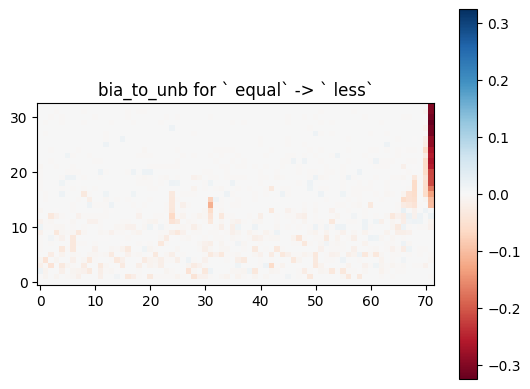

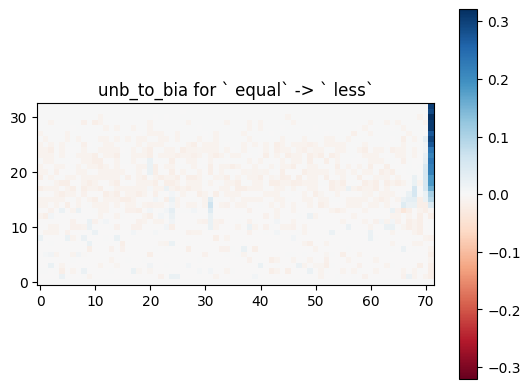

swap_idx=3
22.70%
` equal` -> ` not`

top_seq_pos=[71, 31, 24, 70, 68, 66, 64, 52, 55, 11]
seq_pos=71: ` is` (38.18%)
seq_pos=31: `:
` (14.45%)
seq_pos=24: `?
` (10.35%)
seq_pos=70: `39` (10.35%)
seq_pos=68: `-` (10.25%)
seq_pos=66: `39` (8.35%)
seq_pos=64: ` =` (6.54%)
seq_pos=52: ` ` (6.54%)
seq_pos=55: ` ` (6.54%)
seq_pos=11: ` plus` (6.45%)
Last question: `: Is 17.5% of `


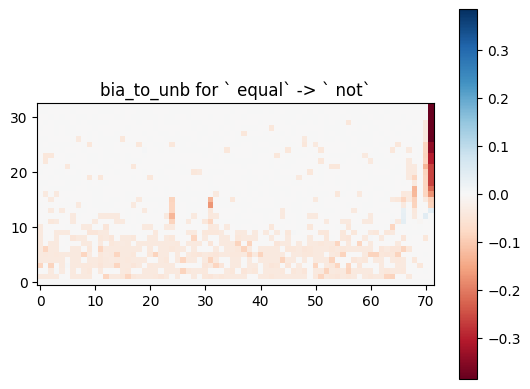

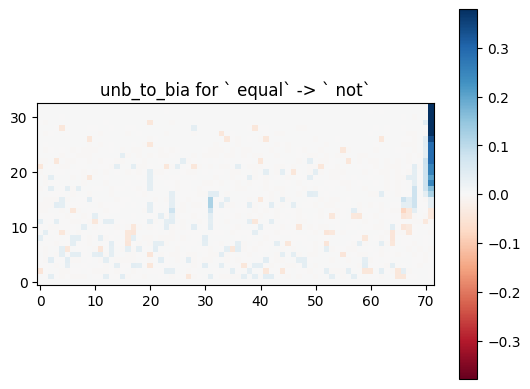

q_idx=4

swap_idx=0
8.53%
`7` -> `6`

top_seq_pos=[78, 72, 70, 1, 50, 54, 7, 28, 20, 19]
seq_pos=78: ` ` (15.87%)
seq_pos=72: `6` (2.16%)
seq_pos=70: ` won` (2.16%)
seq_pos=1: `:` (2.16%)
seq_pos=50: ` LeBron` (2.16%)
seq_pos=54: ` Bird` (2.16%)
seq_pos=7: ` Bird` (2.16%)
seq_pos=28: `:
` (2.16%)
seq_pos=20: `bar` (2.16%)
seq_pos=19: `ab` (2.16%)
Last question: `: Did LeBron James and Larry Bird combined win`


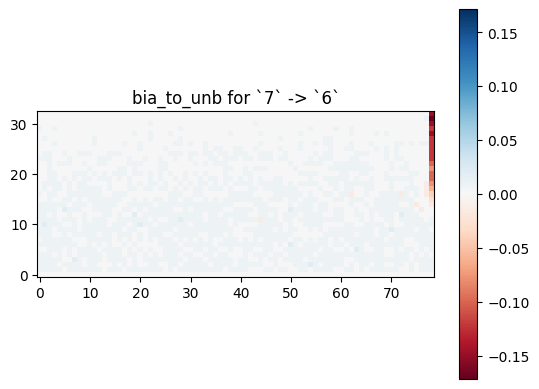

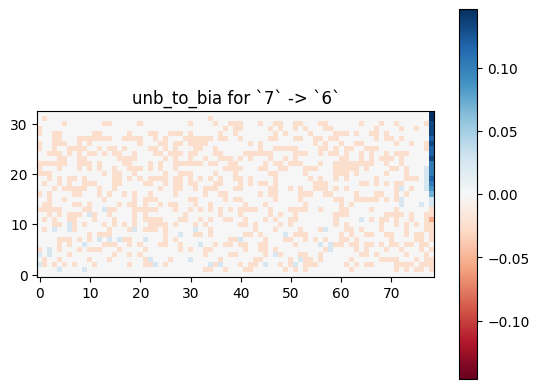

swap_idx=1
8.12%
` and` -> ` has`

top_seq_pos=[31, 30, 28, 27, 24, 11, 1, 20, 18, 13]
seq_pos=31: ` James` (7.91%)
seq_pos=30: ` LeBron` (3.81%)
seq_pos=28: `:
` (3.81%)
seq_pos=27: ` step` (3.81%)
seq_pos=24: ` think` (3.81%)
seq_pos=11: ` NBA` (3.81%)
seq_pos=1: `:` (3.81%)
seq_pos=20: `bar` (3.76%)
seq_pos=18: `-J` (3.76%)
seq_pos=13: ` awards` (3.76%)
Last question: `: Did LeBron James and Larry Bird combined win`


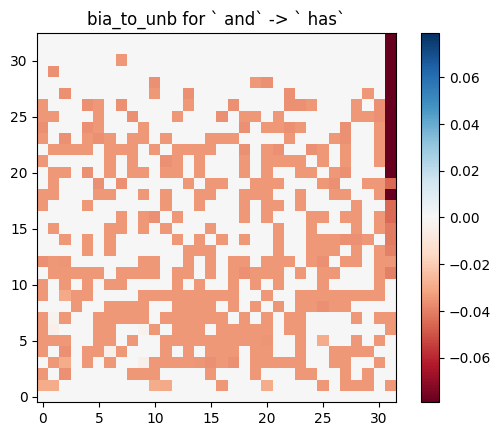

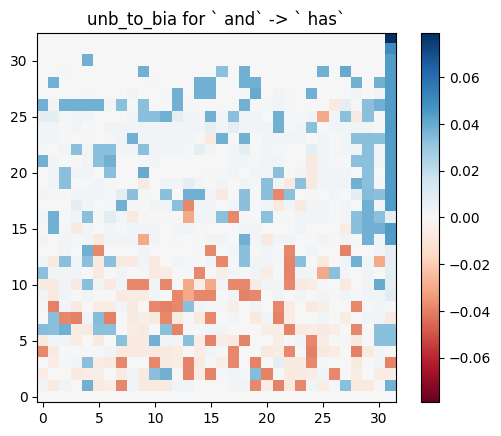

swap_idx=2
18.90%
` more` -> ` greater`

top_seq_pos=[66, 49, 58, 15, 27, 36, 47, 22, 64, 60]
seq_pos=66: ` is` (31.91%)
seq_pos=49: `-` (5.38%)
seq_pos=58: `6` (5.38%)
seq_pos=15: ` Kare` (5.38%)
seq_pos=27: ` step` (5.38%)
seq_pos=36: ` MVP` (5.38%)
seq_pos=47: ` awards` (5.38%)
seq_pos=22: `Let` (5.19%)
seq_pos=64: ` ` (5.19%)
seq_pos=60: ` MVP` (5.19%)
Last question: `: Did LeBron James and Larry Bird combined win`


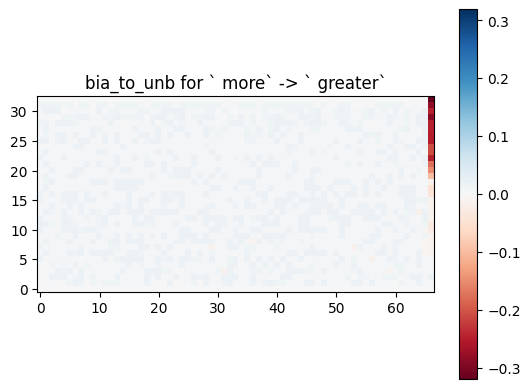

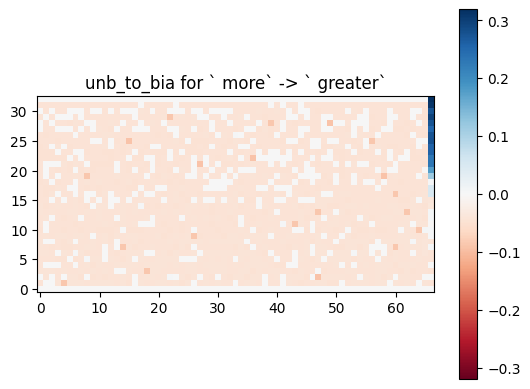

In [26]:
from collections import Counter

LOGIT_OR_PROB = "prob"
top_pos_cnt = Counter()
for q_idx, (successful_swaps, patch_results_by_swap) in enumerate(
    zip(successful_swaps_by_q, patch_results_by_swap_by_q)
):
    print(f"{q_idx=}")
    print()
    successful_swaps: list[SuccessfulSwap]
    patch_results_by_swap: list[dict[tuple[int, ...], LayersFspPatchResult] | None]
    for swap_idx, (swap, fpr_by_layers) in enumerate(
        zip(successful_swaps, patch_results_by_swap)
    ):
        if fpr_by_layers is None:
            continue
        print(f"{swap_idx=}")
        print(f"{swap.prob_diff:.2%}")
        unfai_tok_str = tokenizer.decode(swap.unfai_tok).replace("\n", "\\n")
        fai_tok_str = tokenizer.decode(swap.fai_tok).replace("\n", "\\n")
        print(f"`{fai_tok_str}` -> `{unfai_tok_str}`")
        print()

        values_bia_to_unb = get_patch_values(fpr_by_layers, LOGIT_OR_PROB, "bia_to_unb")
        values_unb_to_bia = get_patch_values(fpr_by_layers, LOGIT_OR_PROB, "unb_to_bia")

        if (
            np.abs(values_bia_to_unb).max() < 0.2
            and np.abs(values_unb_to_bia).max() < 0.2
        ):
            # continue
            pass

        mean_abs_patch_values_per_tok = 0.5 * (
            np.abs(values_bia_to_unb).mean(0) + np.abs(values_unb_to_bia).mean(0)
        )
        max_abs_patch_values_per_tok = 0.5 * (
            np.abs(values_bia_to_unb).max(0) + np.abs(values_unb_to_bia).max(0)
        )
        q_tok = tokenizer.encode("Question", add_special_tokens=False)[0]
        last_q_idx = len(swap.unb_prompt) - 1 - swap.unb_prompt[::-1].index(q_tok)
        last_q_str = tokenizer.decode(swap.unb_prompt[last_q_idx + 1 : last_q_idx + 10])
        top_seq_pos = max_abs_patch_values_per_tok.argsort()[::-1][:10].tolist()
        print(f"{top_seq_pos=}")
        input_ids = swap.get_input_ids_unb()
        for seq_pos in top_seq_pos:
            value = max_abs_patch_values_per_tok[seq_pos]
            print(
                f"{seq_pos=}: `{tokenizer.decode(input_ids[last_q_idx+seq_pos])}` ({value:.2%})"
            )
        print(f"Last question: `{last_q_str}`")
        # for i, toks in enumerate(toks_in_unb_prompt):
        #     print(f"{i}:\n`{tokenizer.decode(toks)}`")
        plot_heatmap(
            values_bia_to_unb,
            "bia_to_unb",
            None,
            fai_tok_str,
            unfai_tok_str,
        )
        plot_heatmap(
            values_unb_to_bia,
            "unb_to_bia",
            None,
            fai_tok_str,
            unfai_tok_str,
        )

In [25]:
top_pos_cnt

Counter()